In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sambava mg
altay cn
hermanus za
hithadhoo mv
airai pw
darhan mn
calabozo ve
barrow us
arraial do cabo br
longyearbyen sj
tucurui br
tuktoyaktuk ca
aswan eg
hobart au
saint-joseph re
fort dodge us
bluff nz
bethel us
mar del plata ar
carballo es
victoria sc
kununurra au
komsomolskiy ru
katherine au
ushuaia ar
airai pw
rikitea pf
chuy uy
opuwo na
port alfred za
santo domingo ec
ushuaia ar
ostrovnoy ru
yar-sale ru
taolanaro mg
abu kamal sy
labuhan id
bluff nz
rikitea pf
bathsheba bb
port alberni ca
chuy uy
taoudenni ml
awjilah ly
fortuna us
warri ng
port alfred za
bafoulabe ml
jumla np
cape town za
sataua ws
castro cl
hobart au
exu br
hobart au
novyy urengoy ru
jamestown sh
mataura pf
kothi in
lata sb
lagoa pt
kieta pg
chokurdakh ru
palmer us
rikitea pf
paradwip in
melilla es
salme ee
cape town za
albany au
east london za
esfarayen ir
avarua ck
jamestown sh
mataura pf
ugoofaaru mv
kahului us
hilo us
aloleng ph
kapaa us
mataura pf
kavaratti in
ribeira grande pt
lompoc us
mataura pf
flinders

provideniya ru
tumannyy ru
lensk ru
yellowknife ca
mataura pf
albany au
yellowknife ca
vaini to
kruisfontein za
xuddur so
mount gambier au
margate za
ushuaia ar
rikitea pf
jamestown sh
tasiilaq gl
mar del plata ar
castro cl
yiyang cn
la palma pa
busselton au
new norfolk au
inhambane mz
ahipara nz
rikitea pf
avarua ck
turan ru
sambava mg
henties bay na
illoqqortoormiut gl
rikitea pf
vaini to
punta arenas cl
montrose us
vanimo pg
dikson ru
ushuaia ar
tasiilaq gl
petropavlovsk-kamchatskiy ru
ushuaia ar
turayf sa
vaini to
avarua ck
castro cl
bengkulu id
hermanus za
thompson ca
herat af
kokopo pg
cape town za
ushuaia ar
port lincoln au
talnakh ru
longyearbyen sj
albany au
hasaki jp
busselton au
khatanga ru
kahului us
ushuaia ar
fortuna us
yellowknife ca
hasaki jp
port hedland au
port elizabeth za
tsihombe mg
qaanaaq gl
ushuaia ar
choctaw us
provideniya ru
port elizabeth za
klaksvik fo
chumikan ru
rikitea pf
jamestown sh
maykain kz
gat ly
markova ru
saint-augustin ca
belushya guba ru
yellowk

rikitea pf
hithadhoo mv
arraial do cabo br
acari pe
jackson us
arraial do cabo br
port alfred za
olafsvik is
itarema br
ramonville-saint-agne fr
cockburn town tc
mataura pf
anadyr ru
barpathar in
hithadhoo mv
mataura pf
tasiilaq gl
mataura pf
puerto ayora ec
mataura pf
hobart au
vaini to
rikitea pf
poum nc
louisbourg ca
kohlu pk
jabiru au
ushuaia ar
talnakh ru
east london za
georgetown sh
jamestown sh
xai-xai mz
santa cruz de tenerife es
luganville vu
illoqqortoormiut gl
yellowknife ca
karratha au
boa vista br
carnarvon au
mildura au
tondano id
ponta do sol cv
baykit ru
los llanos de aridane es
aykhal ru
kawana waters au
provideniya ru
belushya guba ru
ariquemes br
khatanga ru
oistins bb
mehran ir
illoqqortoormiut gl
ushuaia ar
opuwo na
portland au
mataura pf
illoqqortoormiut gl
broken hill au
clyde river ca
tsihombe mg
henties bay na
padang id
barentsburg sj
santa cruz de la palma es
ostrovnoy ru
saint-philippe re
sharjah ae
cidreira br
mataura pf
brandon us
bambous virieux mu
korla c

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b7ebf29130843a0418ab5f77ebdcde86


In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b7ebf29130843a0418ab5f77ebdcde86&q=Boston


In [20]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [21]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | sambava
Processing Record 2 of Set 13 | altay
Processing Record 3 of Set 13 | hermanus
Processing Record 4 of Set 13 | hithadhoo
Processing Record 5 of Set 13 | airai
Processing Record 6 of Set 13 | darhan
Processing Record 7 of Set 13 | calabozo
Processing Record 8 of Set 13 | barrow
Processing Record 9 of Set 13 | arraial do cabo
Processing Record 10 of Set 13 | longyearbyen
Processing Record 11 of Set 13 | tucurui
Processing Record 12 of Set 13 | tuktoyaktuk
Processing Record 13 of Set 13 | aswan
Processing Record 14 of Set 13 | hobart
Processing Record 15 of Set 13 | saint-joseph
Processing Record 16 of Set 13 | fort dodge
Processing Record 17 of Set 13 | bluff
Processing Record 18 of Set 13 | bethel
Processing Record 19 of Set 13 | mar del plata
Processing Record 20 of Set 13 | carballo
Processing Record 21 of Set 13 | victoria
Processing Record 22 of Set 13 | kununurra
Processing Record 23

Processing Record 34 of Set 16 | aklavik
Processing Record 35 of Set 16 | pisco
Processing Record 36 of Set 16 | tasiilaq
Processing Record 37 of Set 16 | nemuro
Processing Record 38 of Set 16 | baykit
Processing Record 39 of Set 16 | fuerte olimpo
Processing Record 40 of Set 16 | pecos
Processing Record 41 of Set 16 | odzun
Processing Record 42 of Set 16 | moussoro
Processing Record 43 of Set 16 | praia da vitoria
Processing Record 44 of Set 16 | mazagao
Processing Record 45 of Set 16 | puerto ayora
Processing Record 46 of Set 16 | saleaula
City not found. Skipping...
Processing Record 47 of Set 16 | saint-augustin
Processing Record 48 of Set 16 | maraba
Processing Record 49 of Set 16 | aflu
City not found. Skipping...
Processing Record 50 of Set 16 | bambous virieux
Processing Record 1 of Set 17 | rungata
City not found. Skipping...
Processing Record 2 of Set 17 | mao
Processing Record 3 of Set 17 | namie
Processing Record 4 of Set 17 | bolshegrivskoye
City not found. Skipping...
Pro

Processing Record 16 of Set 20 | henties bay
Processing Record 17 of Set 20 | montrose
Processing Record 18 of Set 20 | vanimo
Processing Record 19 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 20 of Set 20 | turayf
Processing Record 21 of Set 20 | bengkulu
Processing Record 22 of Set 20 | herat
Processing Record 23 of Set 20 | kokopo
Processing Record 24 of Set 20 | port hedland
Processing Record 25 of Set 20 | choctaw
Processing Record 26 of Set 20 | chumikan
Processing Record 27 of Set 20 | maykain
City not found. Skipping...
Processing Record 28 of Set 20 | gat
Processing Record 29 of Set 20 | markova
Processing Record 30 of Set 20 | monrovia
Processing Record 31 of Set 20 | camacha
Processing Record 32 of Set 20 | tula
Processing Record 33 of Set 20 | amapa
Processing Record 34 of Set 20 | vysokogornyy
Processing Record 35 of Set 20 | baringo
Processing Record 36 of Set 20 | yunhe
Processing Record 37 of Set 20 | duku
Processing Record 38 of Set 20 | skalistyy
City not f

Processing Record 7 of Set 24 | sabang
Processing Record 8 of Set 24 | sanchez
Processing Record 9 of Set 24 | killybegs
Processing Record 10 of Set 24 | halalo
City not found. Skipping...
Processing Record 11 of Set 24 | lapeer
Processing Record 12 of Set 24 | mehamn
Processing Record 13 of Set 24 | rocha
Processing Record 14 of Set 24 | yumen
Processing Record 15 of Set 24 | lerik
Processing Record 16 of Set 24 | pimenteiras
Processing Record 17 of Set 24 | kokkola
Processing Record 18 of Set 24 | acari
Processing Record 19 of Set 24 | jackson
Processing Record 20 of Set 24 | olafsvik
Processing Record 21 of Set 24 | ramonville-saint-agne
Processing Record 22 of Set 24 | cockburn town
Processing Record 23 of Set 24 | barpathar
Processing Record 24 of Set 24 | louisbourg
City not found. Skipping...
Processing Record 25 of Set 24 | kohlu
Processing Record 26 of Set 24 | jabiru
City not found. Skipping...
Processing Record 27 of Set 24 | xai-xai
Processing Record 28 of Set 24 | santa cr

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sambava,-14.2667,50.1667,75.15,88,98,9.86,MG,2022-04-25 20:23:29
1,Altay,47.8667,88.1167,41.38,50,84,5.84,CN,2022-04-25 20:23:30
2,Hermanus,-34.4187,19.2345,51.80,71,0,5.37,ZA,2022-04-25 20:23:30
3,Hithadhoo,-0.6000,73.0833,83.48,75,69,6.98,MV,2022-04-25 20:23:31
4,Airai,-8.9266,125.4092,57.34,76,44,1.01,TL,2022-04-25 20:23:31
5,Darhan,49.4867,105.9228,23.90,43,2,2.13,MN,2022-04-25 20:23:32
6,Calabozo,8.9242,-67.4293,92.79,41,94,4.25,VE,2022-04-25 20:23:32
7,Barrow,71.2906,-156.7887,12.22,79,100,12.66,US,2022-04-25 20:23:33
8,Arraial Do Cabo,-22.9661,-42.0278,76.96,69,20,11.50,BR,2022-04-25 20:19:12
9,Longyearbyen,78.2186,15.6401,3.04,60,75,13.80,SJ,2022-04-25 20:23:34


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sambava,MG,2022-04-25 20:23:29,-14.2667,50.1667,75.15,88,98,9.86
1,Altay,CN,2022-04-25 20:23:30,47.8667,88.1167,41.38,50,84,5.84
2,Hermanus,ZA,2022-04-25 20:23:30,-34.4187,19.2345,51.80,71,0,5.37
3,Hithadhoo,MV,2022-04-25 20:23:31,-0.6000,73.0833,83.48,75,69,6.98
4,Airai,TL,2022-04-25 20:23:31,-8.9266,125.4092,57.34,76,44,1.01
...,...,...,...,...,...,...,...,...,...
564,Svetlogorsk,BY,2022-04-25 20:39:48,52.6333,29.7333,51.87,90,84,6.33
565,Balsas,BR,2022-04-25 20:37:52,-7.5325,-46.0356,78.75,64,8,3.87
566,Iqaluit,CA,2022-04-25 20:39:48,63.7506,-68.5145,4.73,72,75,26.46
567,Singaraja,ID,2022-04-25 20:39:49,-8.1120,115.0882,79.57,83,97,2.21


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

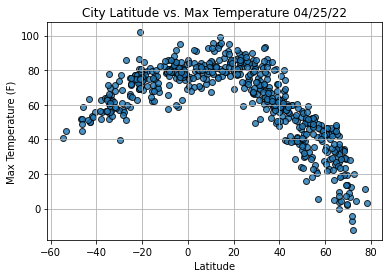

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

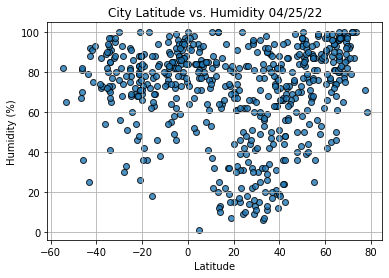

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

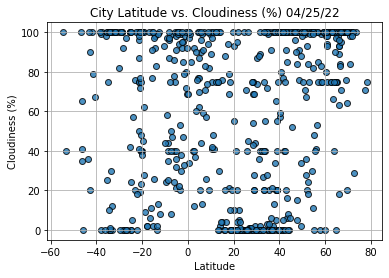

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

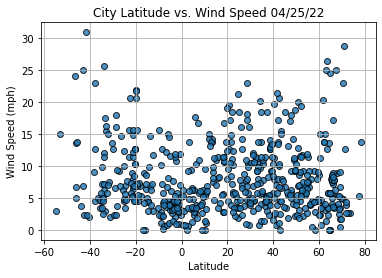

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()